# The Interval Class

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Helper Functions

We start with two functions used commonly in the operations of the Inverval class:

In [2]:
def as_interval(x):
    """
    Returns x, inputted as either a number or an interval, as an interval.
    If x is an interval the function returns just x. 
    """
    if isinstance(x, Interval):
        return x
    return Interval(x)

def is_number(x):
    """
    Given a data value, returns True if it is of type float or int, False otherwise.
    """
    return isinstance(x, int) or isinstance(x, float)

## The Class Definition

Next we move on to the class definition. This includes all of the operator overloads as they are defined. 

In [4]:
class Interval():
    """
    A class representing a closed interval of real numbers.
    This class can undergo arithmetic operations with other intervals,
    and of real numbers, where a real number n is represented as [n, n].
    """
    def __init__(self, *args):
        """
        Initializes an interval
        Given one numeric parameter
        """
        self.left = args[0]
        if len(args) > 1:
            self.right = args[1]
        else:
            self.right = args[0]
        if not is_number(self.left) or not is_number(self.right):
            raise ValueError("arguments must be numbers")

    def __add__(self, other):
        """
        Adds this interval to another interval
        """
        other = as_interval(other)
        return Interval(self.left + other.left, self.right + other.right)

    def __radd__(self, other):
        """
        The reverse order of the add method
        Addition of intervals is commutative
        """
        return self + other

    def __sub__(self, other):
        """
        Subtracts another interval from this interval
        """
        other = as_interval(other)
        return Interval(self.left - other.right, self.right - other.left)
    
    def __rsub__(self, other):
        """
        Subtracts this interval from another interval
        """
        return as_interval(other) - self

    def __mul__(self, other):
        """
        Multiplies this interval with another interval
        """
        other = as_interval(other)
        combinations = [self.left * other.left, self.left * other.right, self.right * other.left, self.right * other.right]
        return Interval(min(combinations), max(combinations))

    def __rmul__(self, other):
        """
        Multiplies another interval with this interval
        Multiplication commutes
        """
        return self * other

    def __div__(self, other):
        """
        Divides this interval by another interval
        """
        other = as_interval(other)
        combinations = [self.left / other.left, self.left / other.right, self.right / other.left, self.right / other.right]
        return Interval(min(combinations), max(combinations))

    def __pow__(self, power):
        """
        Takes this interval to an integer power
        """
        if type(power) != int:
            raise ValueError("power must be an integer")
        if power % 2 == 0:
            if self.left >= 0:
                return Interval(self.left**power, self.right**power)
            elif self.right < 0:
                return Interval(self.right**power, self.left**power)
            else:
                return Interval(0, max([self.right**power, self.left**power]))
        return Interval(self.left**power, self.right**power)

    def __contains__(self, item):
        """
        Returns whetehr or not the given item lies within the bounds of the interval
        """
        if not is_number(item):
            raise ValueError("Item must be a number")
        return item >= self.left and item <= self.right

    def __str__(self):
        """
        Returns a string representation of the interval
        """
        return "[%s, %s]" % (self.left, self.right)


## Testing the Implementation

Now we test the implementation to see that we have the ideal behavior when performing operations.

In [5]:
i1 = Interval(1, 4)
i2 = Interval(-2, -1)
i3 = Interval(2, 3)
i4 = Interval(-2, 2)
#Testing the string representation
print(i1)
print(i2)
print(i3)
print(i4)
#Testing the arithmetic operations
print(i1 + i2)
print(i1 - i2)
print(i1 * i2)
print(i1 / i2)
#Testing both directions of operation
print(i3 + 1)
print(1 + i3)
print(i3 - 1)
print(1 - i3)
print(i3 * 1)
print(1 * i3)
#Testing the power function
print(i4**2)
print(i4**3)
#Testing the contains functionality
print(3 in i1)
print(5 in i1)

[1, 4]
[-2, -1]
[2, 3]
[-2, 2]
[-1, 3]
[2, 6]
[-8, -1]
[-4, -1]
[3, 4]
[3, 4]
[1, 2]
[-2, -1]
[2, 3]
[2, 3]
[0, 4]
[-8, 8]
True
False


## Plotting a Polynomial

Now we will plot the results of a polynomial function of an interval, given below. We will plots this with a series of intervals given by [x, x + 0.5] for x between 0 and 1. 

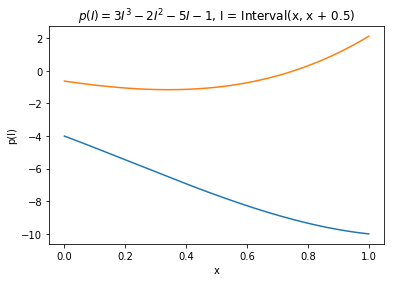

In [6]:
def p(i):
    """
    The interval polynomial defined in the problem description.
    Returns an interval resulting from the interval parameter.
    """
    return 3 * i**3 - 2 * i**2 - 5 * i - 1

#Plotting
x = np.linspace(0.0, 1, 1000)
y_intervals = [p(Interval(x[i], x[i] + 0.5)) for i in range(len(x))]
y_lower = [i.left for i in y_intervals]
y_upper = [i.right for i in y_intervals]
#Labels
plt.xlabel("x")
plt.ylabel("p(I)")
plt.title("$p(I) = 3I^3 - 2I^2 - 5I - 1$, I = Interval(x, x + 0.5)")
#Plot the lower and upper bounds
plt.plot(x, y_lower)
plt.plot(x, y_upper)